<a href="https://colab.research.google.com/github/dyna-bytes/PyTorchIntensive/blob/main/2_3_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 변수의 shape, type, value 확인
def p(var,_str='') :
    if _str=='\n' or _str=='cr' :
        _str = '\n'
    else :
        print(f'<<{_str}>>:')
        _str = ''
    if type(var)!=type([]):
        try:
            print(f'Shape:{var.shape}')
        except :
            pass
    print(f'Type: {type(var)}')
    print(f'Values: {var}'+_str)

def pst(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}, {type(_x)}')
def ps(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}')

In [2]:
%%capture
!pip install pytorch_lightning torchinfo torchmetrics torchviz

# Basic concepts of PyTorch

In [3]:
import torch
from torch import nn
from torch.nn import functional as F
import torch.optim as optim

import pytorch_lightning as pl
from pytorch_lightning.accelerators import accelerator
from torchmetrics import functional as FM
from torchinfo import summary

from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import torch.utils.data as data
from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 3.5]

torch.__version__,pl.__version__

('2.0.1+cu118', '2.0.3')

## Tensor

* Tensor 생성하기

In [ ]:
# 생성하기
x = torch.Tensor([[1, 2], [3, 4]]) #(2,2)
p(x,'\n')
x = torch.Tensor([2, 3, 4])        #(3,)
p(x,'\n')
x = torch.Tensor(2, 3, 4)          #(2,3,4)
p(x,'(2,3,4)')
x = torch.rand(2, 3, 4)            #(2,3,4)
p(x,'rand(2,3,4)')
print(x.shape)  #[2,3,4]
print(x.size()) #[2,3,4]

Shape:torch.Size([2, 2])
Type: <class 'torch.Tensor'>
Values: tensor([[1., 2.],
        [3., 4.]])

Shape:torch.Size([3])
Type: <class 'torch.Tensor'>
Values: tensor([2., 3., 4.])

<<(2,3,4)>>:
Shape:torch.Size([2, 3, 4])
Type: <class 'torch.Tensor'>
Values: tensor([[[-6.1734e+22,  4.5560e-41, -4.0467e+22,  4.5560e-41],
         [-6.3849e+37,  4.5559e-41, -9.0691e+21,  4.5560e-41],
         [-6.3617e+37,  4.5559e-41, -2.5259e+18,  4.5560e-41]],

        [[-6.4228e+37,  4.5559e-41, -6.9366e+22,  4.5560e-41],
         [-6.0319e+22,  4.5560e-41, -7.1975e+22,  4.5560e-41],
         [-7.1977e+22,  4.5560e-41, -7.1975e+22,  4.5560e-41]]])
<<rand(2,3,4)>>:
Shape:torch.Size([2, 3, 4])
Type: <class 'torch.Tensor'>
Values: tensor([[[0.6362, 0.0089, 0.4223, 0.4719],
         [0.3601, 0.4094, 0.6413, 0.7917],
         [0.3803, 0.8436, 0.2745, 0.9891]],

        [[0.0779, 0.7667, 0.8084, 0.7730],
         [0.3550, 0.3508, 0.9294, 0.8290],
         [0.6671, 0.3273, 0.4959, 0.4211]]])
torch.Size([2, 

* 변환하기 ndarray <-> tensor

In [ ]:
# 변환하기 ndarray <-> tensor
np_arr = np.array([[1, 2], [3, 4]])
p(np_arr,'np_arr') #(2,2)

tensor = torch.from_numpy(np_arr)
p(tensor,'tensor') #size([2,2])

np_arr = tensor.numpy()
p(np_arr,'np_arr')

<<np_arr>>:
Shape:(2, 2)
Type: <class 'numpy.ndarray'>
Values: [[1 2]
 [3 4]]
<<tensor>>:
Shape:torch.Size([2, 2])
Type: <class 'torch.Tensor'>
Values: tensor([[1, 2],
        [3, 4]])
<<np_arr>>:
Shape:(2, 2)
Type: <class 'numpy.ndarray'>
Values: [[1 2]
 [3 4]]


* add

In [ ]:
# add
x1 = torch.Tensor([[1, 2], [3, 4]])
x2 = torch.Tensor([[1, 2], [3, 4]])
y = x1 + x2
print("X1", x1)
print("X2", x2)
print("Y", y)

x2.add_(x1) # ??_() in-place operation.
print("X2", x2)

X1 tensor([[1., 2.],
        [3., 4.]])
X2 tensor([[1., 2.],
        [3., 4.]])
Y tensor([[2., 4.],
        [6., 8.]])
X2 tensor([[2., 4.],
        [6., 8.]])


* reshape, permute

In [9]:
# reshape, permute
x = torch.arange(6)
print("X", x)
x = x.view(2, 3)     # reshape
print("X", x)
x = x.permute(1, 0)  # Swapping dimension 0 and 1
print("X", x)
print("X[0, :]", x[0, :]) # first dimension: row
print("X[:, 0]", x[:, 0]) # second dimension: column

X tensor([0, 1, 2, 3, 4, 5])
X tensor([[0, 1, 2],
        [3, 4, 5]])
X tensor([[0, 3],
        [1, 4],
        [2, 5]])
X[0, :] tensor([0, 3])
X[:, 0] tensor([0, 1, 2])


* matrix multiplications

In [ ]:
# matrix multiplications
x = torch.arange(6).view(2, 3)
print("X", x)
W = torch.arange(6).view(3,2)
print("W", W)
h = torch.matmul(x, W) # or .mm or .bmm(batch mm, for 3D)
print("h", h)

X tensor([[0, 1, 2],
        [3, 4, 5]])
W tensor([[0, 1],
        [2, 3],
        [4, 5]])
h tensor([[10, 13],
        [28, 40]])


* indexing

In [ ]:
# indexing
x = torch.arange(12).view(3, 4)
print(x)
print(x[:, 1])  # Second column
print(x[0])     # First row
print(x[:2, -1])# First two rows, last column
print(x[1:3, :])# Middle two rows

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([1, 5, 9])
tensor([0, 1, 2, 3])
tensor([3, 7])
tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


* with gradients, Only float tensors can have gradients

In [ ]:
# with gradients # Only float tensors can have gradients
x = torch.arange(3, dtype=torch.float32)
p(x,'x')

x.requires_grad_(True) # _() in-place oper.
p(x,'x_grad')

x = torch.arange(3, dtype=torch.float32, requires_grad=True)
p(x,'x_grad')

<<x>>:
Shape:torch.Size([3])
Type: <class 'torch.Tensor'>
Values: tensor([0., 1., 2.])
<<x_grad>>:
Shape:torch.Size([3])
Type: <class 'torch.Tensor'>
Values: tensor([0., 1., 2.], requires_grad=True)
<<x_grad>>:
Shape:torch.Size([3])
Type: <class 'torch.Tensor'>
Values: tensor([0., 1., 2.], requires_grad=True)


## Computation Graph

In [ ]:
def func(x):
  y = (x-2)**2 + 10
  return y

yl=[]
x = np.linspace(-5,5,100)
for i, x_ in enumerate(x):
  y_ = func(x_)
  yl.append(y_)
y = np.array(yl)
p(y,'y')

<<y>>:
Shape:(100,)
Type: <class 'numpy.ndarray'>
Values: [59.         57.59606163 56.21252933 54.84940312 53.50668299 52.18436894
 50.88246097 49.60095909 48.33986328 47.09917355 45.87888991 44.67901235
 43.49954086 42.34047546 41.20181614 40.0835629  38.98571574 37.90827467
 36.85123967 35.81461075 34.79838792 33.80257117 32.82716049 31.8721559
 30.93755739 30.02336496 29.12957861 28.25619835 27.40322416 26.57065606
 25.75849403 24.96673809 24.19538823 23.44444444 22.71390674 22.00377512
 21.31404959 20.64473013 19.99581675 19.36730946 18.75920824 18.17151311
 17.60422406 17.05734109 16.5308642  16.02479339 15.53912866 15.07387001
 14.62901745 14.20457096 13.80053056 13.41689624 13.05366799 12.71084583
 12.38842975 12.08641975 11.80481584 11.543618   11.30282624 11.08244057
 10.88246097 10.70288746 10.54372003 10.40495868 10.28660341 10.18865422
 10.11111111 10.05397408 10.01724314 10.00091827 10.00499949 10.02948679
 10.07438017 10.13967962 10.22538516 10.33149679 10.45801449 10.604

In [ ]:
x = torch.linspace(-5,5,100,requires_grad=True)
p(x,'x')

<<x>>:
Shape:torch.Size([100])
Type: <class 'torch.Tensor'>
Values: tensor([-5.0000, -4.8990, -4.7980, -4.6970, -4.5960, -4.4949, -4.3939, -4.2929,
        -4.1919, -4.0909, -3.9899, -3.8889, -3.7879, -3.6869, -3.5859, -3.4848,
        -3.3838, -3.2828, -3.1818, -3.0808, -2.9798, -2.8788, -2.7778, -2.6768,
        -2.5758, -2.4747, -2.3737, -2.2727, -2.1717, -2.0707, -1.9697, -1.8687,
        -1.7677, -1.6667, -1.5657, -1.4646, -1.3636, -1.2626, -1.1616, -1.0606,
        -0.9596, -0.8586, -0.7576, -0.6566, -0.5556, -0.4545, -0.3535, -0.2525,
        -0.1515, -0.0505,  0.0505,  0.1515,  0.2525,  0.3535,  0.4545,  0.5556,
         0.6566,  0.7576,  0.8586,  0.9596,  1.0606,  1.1616,  1.2626,  1.3636,
         1.4646,  1.5657,  1.6667,  1.7677,  1.8687,  1.9697,  2.0707,  2.1717,
         2.2727,  2.3737,  2.4747,  2.5758,  2.6768,  2.7778,  2.8788,  2.9798,
         3.0808,  3.1818,  3.2828,  3.3838,  3.4848,  3.5859,  3.6869,  3.7879,
         3.8889,  3.9899,  4.0909,  4.1919,  4.2929,

## $y = (x-2)^2 + 10$

In [ ]:
def func(x):
  y = (x-2)**2 + 10
  return y

yl=[]
x = torch.linspace(-5,5,100,requires_grad=True)
for i, x_ in enumerate(x):
  y_ = func(x_)
  y_.backward()
  yl.append(y_.detach().numpy())
y = np.array(yl)

print('\ny:',y)
print('\nx.grad:',x.grad)


y: [59.        57.596058  56.21253   54.8494    53.506683  52.18437
 50.88246   49.600956  48.339867  47.09917   45.878887  44.679012
 43.499542  42.340477  41.201813  40.083565  38.985718  37.908276
 36.85124   35.814613  34.798393  33.802574  32.82716   31.872158
 30.937557  30.023367  29.129578  28.256197  27.403225  26.570658
 25.758495  24.96674   24.195389  23.444445  22.713907  22.003777
 21.31405   20.64473   19.99582   19.36731   18.759209  18.171513
 17.604225  17.05734   16.530865  16.024794  15.539129  15.07387
 14.629018  14.204571  13.80053   13.416896  13.053668  12.710846
 12.38843   12.08642   11.804815  11.543617  11.302826  11.08244
 10.882461  10.702888  10.54372   10.404959  10.286603  10.188654
 10.111111  10.053974  10.017243  10.000918  10.004999  10.029487
 10.07438   10.13968   10.225385  10.331497  10.4580145 10.6049385
 10.772268  10.960004  11.168146  11.396694  11.645649  11.915009
 12.204775  12.514948  12.845526  13.19651   13.567902  13.959698
 14.3719

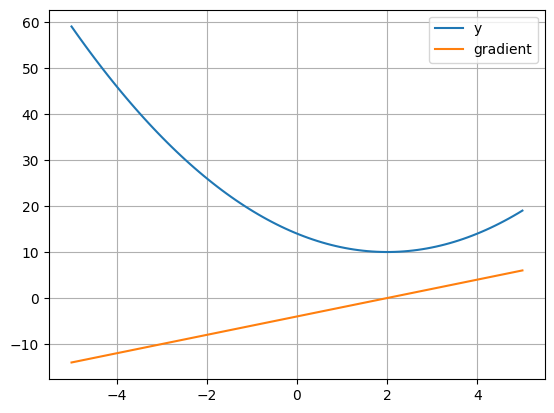

In [ ]:
plt.plot(x.detach().numpy(),y,label='y')
plt.plot(x.detach().numpy(),x.grad,label='gradient')
plt.grid()
plt.legend()
plt.show()

## $y = \frac{1}{|x_d|}𝚺[(x_i+2)^2+3]$

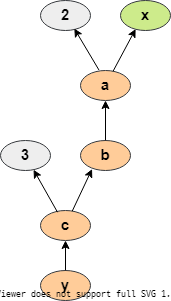

In [ ]:
# Dynamic Computation Graph and Backpropagation
x = torch.arange(3, dtype=torch.float32, requires_grad=True)
print("X", x)

def func(x):
  a = x + 2
  print("a",a)
  b = a ** 2
  print("b",b)
  c = b + 3
  print("c",c)
  return c.mean()

y = func(x)
print("Y", y)

X tensor([0., 1., 2.], requires_grad=True)
a tensor([2., 3., 4.], grad_fn=<AddBackward0>)
b tensor([ 4.,  9., 16.], grad_fn=<PowBackward0>)
c tensor([ 7., 12., 19.], grad_fn=<AddBackward0>)
Y tensor(12.6667, grad_fn=<MeanBackward0>)


In [ ]:
print('x.grad:',x.grad)
y.backward()
print('x.grad:',x.grad)

x.grad: None
x.grad: tensor([1.3333, 2.0000, 2.6667])


In [ ]:
p(x,'x')
p(x.grad,'x.grad')
#p(x.grad_fn,'x.grad_fn') #None

p(y,'y')
#p(y.grad,'y.grad') #None
p(y.grad_fn,'y.grad_fn')

<<x>>:
Shape:torch.Size([3])
Type: <class 'torch.Tensor'>
Values: tensor([0., 1., 2.], requires_grad=True)
<<x.grad>>:
Shape:torch.Size([3])
Type: <class 'torch.Tensor'>
Values: tensor([1.3333, 2.0000, 2.6667])
<<y>>:
Shape:torch.Size([])
Type: <class 'torch.Tensor'>
Values: 12.666666984558105
<<y.grad_fn>>:
Type: <class 'MeanBackward0'>
Values: <MeanBackward0 object at 0x7f01d4606950>


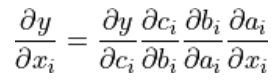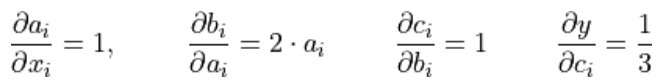

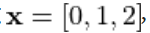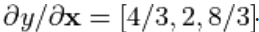

## Layer

$y=xA^T+b$
$y=xW^T+b$
A,W : weight or kernel weight
b :   bias or bias weight

In [ ]:
torch.manual_seed(42)  # Setting the seed
layer = nn.Sequential(
    nn.Linear(10, 2),
    nn.ReLU())
inputs = torch.rand((3, 10))
outputs = layer(inputs)

In [ ]:
p(inputs,'inputs')

<<inputs>>:
Shape:torch.Size([3, 10])
Type: <class 'torch.Tensor'>
Values: tensor([[0.2969, 0.8317, 0.1053, 0.2695, 0.3588, 0.1994, 0.5472, 0.0062, 0.9516,
         0.0753],
        [0.8860, 0.5832, 0.3376, 0.8090, 0.5779, 0.9040, 0.5547, 0.3423, 0.6343,
         0.3644],
        [0.7104, 0.9464, 0.7890, 0.2814, 0.7886, 0.5895, 0.7539, 0.1952, 0.0050,
         0.3068]])


In [ ]:
p(layer,'layer')      # Sequential class
p(layer[0],'layer[0]')# Linear class

<<layer>>:
Type: <class 'torch.nn.modules.container.Sequential'>
Values: Sequential(
  (0): Linear(in_features=10, out_features=2, bias=True)
  (1): ReLU()
)
<<layer[0]>>:
Type: <class 'torch.nn.modules.linear.Linear'>
Values: Linear(in_features=10, out_features=2, bias=True)


In [ ]:
p(layer.state_dict(),'layer')    # all layers weight,bias
p(layer[0].state_dict(),'layer[0]') #(2 node):weight,bias
p(layer[1].state_dict(),'layer[1]') # Null Dict.

<<layer>>:
Type: <class 'collections.OrderedDict'>
Values: OrderedDict([('0.weight', tensor([[ 0.2418,  0.2625, -0.0741,  0.2905, -0.0693,  0.0638, -0.1540,  0.1857,
          0.2788, -0.2320],
        [ 0.2749,  0.0592,  0.2336,  0.0428,  0.1525, -0.0446,  0.2438,  0.0467,
         -0.1476,  0.0806]])), ('0.bias', tensor([-0.1457, -0.0371]))])
<<layer[0]>>:
Type: <class 'collections.OrderedDict'>
Values: OrderedDict([('weight', tensor([[ 0.2418,  0.2625, -0.0741,  0.2905, -0.0693,  0.0638, -0.1540,  0.1857,
          0.2788, -0.2320],
        [ 0.2749,  0.0592,  0.2336,  0.0428,  0.1525, -0.0446,  0.2438,  0.0467,
         -0.1476,  0.0806]])), ('bias', tensor([-0.1457, -0.0371]))])
<<layer[1]>>:
Type: <class 'collections.OrderedDict'>
Values: OrderedDict()


In [ ]:
p(layer[0].state_dict()['weight']) #(2,10)
p(layer[0].state_dict()['weight'][0,0:3])

<<>>:
Shape:torch.Size([2, 10])
Type: <class 'torch.Tensor'>
Values: tensor([[ 0.2418,  0.2625, -0.0741,  0.2905, -0.0693,  0.0638, -0.1540,  0.1857,
          0.2788, -0.2320],
        [ 0.2749,  0.0592,  0.2336,  0.0428,  0.1525, -0.0446,  0.2438,  0.0467,
         -0.1476,  0.0806]])
<<>>:
Shape:torch.Size([3])
Type: <class 'torch.Tensor'>
Values: tensor([ 0.2418,  0.2625, -0.0741])


In [ ]:
p(layer.named_parameters(),'\n') # generator
m = next(layer.named_parameters())
p(m,'named_para.')  #1st layer:(name, parameter)

Type: <class 'generator'>
Values: <generator object Module.named_parameters at 0x7f00f3f00c10>

<<named_para.>>:
Type: <class 'tuple'>
Values: ('0.weight', Parameter containing:
tensor([[ 0.2418,  0.2625, -0.0741,  0.2905, -0.0693,  0.0638, -0.1540,  0.1857,
          0.2788, -0.2320],
        [ 0.2749,  0.0592,  0.2336,  0.0428,  0.1525, -0.0446,  0.2438,  0.0467,
         -0.1476,  0.0806]], requires_grad=True))


In [ ]:
p(m[0],'name')
p(m[1],'parameter')

<<name>>:
Type: <class 'str'>
Values: 0.weight
<<parameter>>:
Shape:torch.Size([2, 10])
Type: <class 'torch.nn.parameter.Parameter'>
Values: Parameter containing:
tensor([[ 0.2418,  0.2625, -0.0741,  0.2905, -0.0693,  0.0638, -0.1540,  0.1857,
          0.2788, -0.2320],
        [ 0.2749,  0.0592,  0.2336,  0.0428,  0.1525, -0.0446,  0.2438,  0.0467,
         -0.1476,  0.0806]], requires_grad=True)


In [ ]:
p(outputs)

<<>>:
Shape:torch.Size([3, 2])
Type: <class 'torch.Tensor'>
Values: tensor([[0.3674, 0.1750],
        [0.5197, 0.4892],
        [0.1312, 0.7214]], grad_fn=<ReluBackward0>)


## PyTorch Model

### **Continuous XOR**

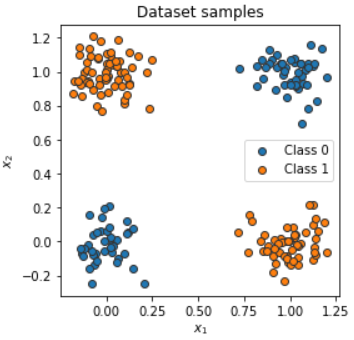 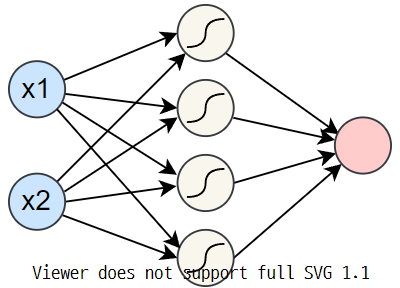

In [ ]:
class SimpleClassifier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        self.linear1 = nn.Linear(num_inputs, num_hidden) #(2,4)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs) #(4,1)
    def forward(self, x):
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [ ]:
p(model.named_parameters(),'\n') # generator
m = next(model.named_parameters())
p(m,'m')    # 1st layer : (name, parameter)
p(m[0],'name')
p(m[1],'parameter')

Type: <class 'generator'>
Values: <generator object Module.named_parameters at 0x7f2ab89f0cf0>

<<m>>:
Type: <class 'tuple'>
Values: ('linear1.weight', Parameter containing:
tensor([[-0.5424,  0.5802],
        [ 0.2037,  0.2929],
        [ 0.2236, -0.0123],
        [ 0.5534, -0.5024]], requires_grad=True))
<<name>>:
Type: <class 'str'>
Values: linear1.weight
<<parameter>>:
Shape:torch.Size([4, 2])
Type: <class 'torch.nn.parameter.Parameter'>
Values: Parameter containing:
tensor([[-0.5424,  0.5802],
        [ 0.2037,  0.2929],
        [ 0.2236, -0.0123],
        [ 0.5534, -0.5024]], requires_grad=True)


In [ ]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


In [ ]:
class XORDataset(data.Dataset):
    def __init__(self, size, std=0.1):
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [ ]:
dataset = XORDataset(size=200)
print("Size of dataset:", dataset.__len__())
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([ 1.0019, -0.1070]), tensor(1))


In [ ]:
def visualize_samples(data, label):
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

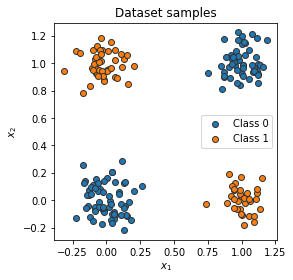

In [ ]:
visualize_samples(dataset.data, dataset.label)
plt.show()

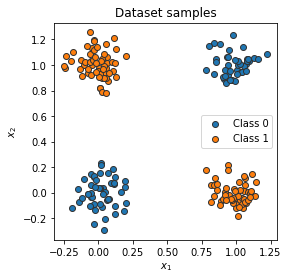

In [ ]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)
data_inputs, data_labels = next(iter(data_loader))

print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[-9.5197e-02,  9.9135e-01],
        [ 1.0413e+00,  6.1524e-04],
        [ 1.0105e+00,  9.6741e-01],
        [ 1.0002e+00,  9.1755e-01],
        [ 9.3966e-01,  1.0463e+00],
        [ 1.0946e+00, -1.1293e-01],
        [-5.2773e-02, -4.7699e-02],
        [ 3.4977e-03,  9.5166e-01]])
Data labels torch.Size([8]) 
 tensor([1, 1, 0, 0, 0, 1, 0, 1])


Loss func = Binary Cross Entropy(BCE)
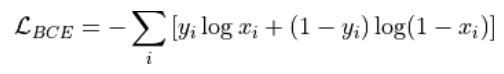

In [ ]:
loss_module = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
from tqdm import tqdm  ## tqdm means "progress" in Arabic

def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    model.train() # Set model to train mode
    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:
            # Step 1: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # [Batch size] <- [Batch size, 1]
            # Step 2: Calculate the loss
            loss = loss_module(preds, data_labels.float())
            # Step 3: Perform backpropagation
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()
            # Step 4: Update the parameters
            optimizer.step()
    print('\n',loss)

In [ ]:
train_dataset = XORDataset(size=1000)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)
train_model(model, optimizer, train_data_loader, loss_module)

100%|██████████| 100/100 [00:00<00:00, 110.03it/s]


 tensor(0.2395, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


In [ ]:
def eval_model(model, data_loader):
  model.eval()  # Set model to eval mode
  true_preds, num_preds = 0.0, 0.0
  with torch.no_grad():  # Deactivate gradients for the following code
    for data_inputs, data_labels in data_loader:
      preds = model(data_inputs)
      preds = preds.squeeze(dim=1)
      preds = torch.sigmoid(preds)  # Sigmoid to map predictions between 0 and 1
      pred_labels = (preds >= 0.5).long()  # Binarize predictions to 0 and 1
      # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
      true_preds += (pred_labels == data_labels).sum()
      num_preds += data_labels.shape[0]
  acc = true_preds / num_preds
  print(f"Accuracy of the model: {100.0*acc:4.2f}%")

test_dataset = XORDataset(size=500)
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)
eval_model(model, test_data_loader)

Accuracy of the model: 100.00%


/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


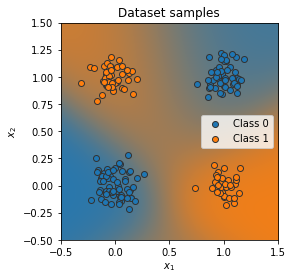

In [ ]:
from matplotlib.colors import to_rgba

@torch.no_grad() # Decorator: torch.no_grad(), over the whole function.
def visualize_classification(model, data, label):
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    c0 = torch.Tensor(to_rgba("C0")) #[4]
    c1 = torch.Tensor(to_rgba("C1"))
    x1 = torch.arange(-0.5, 1.5, step=0.01) #[200]
    x2 = torch.arange(-0.5, 1.5, step=0.01)
    xx1, xx2 = torch.meshgrid(x1, x2) #[200,200],[200,200]
    model_inputs = torch.stack([xx1, xx2], dim=-1) #[200,200,2]

    preds = model(model_inputs) #[200,200,1]
    preds = torch.sigmoid(preds)

    # Specifying "None" in a dimension creates a new one
    # [200,200,4] <- [200,200,1] * ([1,1,4] <- [4])
    output_image = (1 - preds) * c0[None, None] + preds * c1[None, None]
    output_image = output_image.numpy()

    plt.imshow(output_image, origin="lower", extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)

visualize_classification(model, dataset.data, dataset.label)
plt.show()

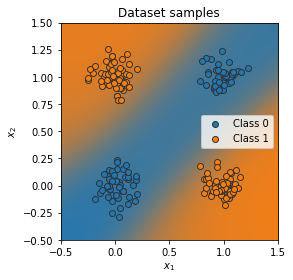

# Layer APIs

**overview**

---
```python
#PyTorch에서 지원하는 layer
Linear Layers
  nn.Identity
  nn.Linear
  nn.Bilinear
  nn.LazyLinear
Non-linear Activations (weighted sum, nonlinearity)
  nn.ELU
  nn.Hardshrink
  nn.Hardsigmoid
  nn.Hardtanh
  nn.Hardswish
  nn.LeakyReLU
  nn.LogSigmoid
  nn.MultiheadAttention
  nn.PReLU
  nn.ReLU
  nn.ReLU6
  nn.RReLU
  nn.SELU
  nn.CELU
  nn.GELU
  nn.Sigmoid
  nn.SiLU
  nn.Mish
  nn.Softplus
  nn.Softshrink
  nn.Softsign
  nn.Tanh
  nn.Tanhshrink
  nn.Threshold
  nn.GLU
  ```


  ```python
Non-linear Activations (other)
  nn.Softmin
  nn.Softmax
  nn.Softmax2d
  nn.LogSoftmax
  nn.AdaptiveLogSoftmaxWithLoss
Recurrent layers
  nn.RNNBase
  nn.RNN
  nn.LSTM
  nn.GRU
  nn.RNNCell
  nn.LSTMCell
  nn.GRUCell
Convolution layers
  nn.Conv1d
  nn.Conv2d
  nn.Conv3d
  nn.ConvTranspose1d
  nn.ConvTranspose2d
  nn.ConvTranspose3d
  nn.LazyConv1d
  nn.LazyConv2d
  nn.LazyConv3d
  nn.LazyConvTranspose1d
  nn.LazyConvTranspose2d
  nn.LazyConvTranspose3d
  nn.Unfold
  nn.Fold
Dropout Layers
  nn.Dropout
  nn.Dropout2d
  nn.Dropout3d
  nn.AlphaDropout
  nn.FeatureAlphaDropout
```

```python
Normalization Layers
  nn.BatchNorm1d
  nn.BatchNorm2d
  nn.BatchNorm3d
  nn.LazyBatchNorm1d
  nn.LazyBatchNorm2d
  nn.LazyBatchNorm3d
  nn.GroupNorm
  nn.SyncBatchNorm
  nn.InstanceNorm1d
  nn.InstanceNorm2d
  nn.InstanceNorm3d
  nn.LazyInstanceNorm1d
  nn.LazyInstanceNorm2d
  nn.LazyInstanceNorm3d
  nn.LayerNorm
  nn.LocalResponseNorm
Pooling layers
  nn.MaxPool1d
  nn.MaxPool2d
  nn.MaxPool3d
  nn.MaxUnpool1d
  nn.MaxUnpool2d
  nn.MaxUnpool3d
  nn.AvgPool1d
  nn.AvgPool2d
  nn.AvgPool3d
  nn.FractionalMaxPool2d
  nn.FractionalMaxPool3d
  nn.LPPool1d
  nn.LPPool2d
  nn.AdaptiveMaxPool1d
  nn.AdaptiveMaxPool2d
  nn.AdaptiveMaxPool3d
  nn.AdaptiveAvgPool1d
  nn.AdaptiveAvgPool2d
  nn.AdaptiveAvgPool3d
Padding Layers
  nn.ReflectionPad1d
  nn.ReflectionPad2d
  nn.ReflectionPad3d
  nn.ReplicationPad1d
  nn.ReplicationPad2d
  nn.ReplicationPad3d
  nn.ZeroPad2d
  nn.ConstantPad1d
  nn.ConstantPad2d
  nn.ConstantPad3d
Shuffle Layers
  nn.ChannelShuffle
Transformer Layers
  nn.Transformer
  nn.TransformerEncoder
  nn.TransformerDecoder
  nn.TransformerEncoderLayer
  nn.TransformerDecoderLayer
Sparse Layers
  nn.Embedding
  nn.EmbeddingBag
Vision Layers
  nn.PixelShuffle
  nn.PixelUnshuffle
  nn.Upsample
  nn.UpsamplingNearest2d
  nn.UpsamplingBilinear2d
```


```python
#기타 class, functions,methods
Distance Functions
  nn.CosineSimilarity
  nn.PairwiseDistance
Loss Functions
  nn.L1Loss
  nn.MSELoss
  nn.CrossEntropyLoss
  nn.CTCLoss
  nn.NLLLoss
  nn.PoissonNLLLoss
  nn.GaussianNLLLoss
  nn.KLDivLoss
  nn.BCELoss
  nn.BCEWithLogitsLoss
  nn.MarginRankingLoss
  nn.HingeEmbeddingLoss
  nn.MultiLabelMarginLoss
  nn.HuberLoss
  nn.SmoothL1Loss
  nn.SoftMarginLoss
  nn.MultiLabelSoftMarginLoss
  nn.CosineEmbeddingLoss
  nn.MultiMarginLoss
  nn.TripletMarginLoss
  nn.TripletMarginWithDistanceLoss
The base Layer class
  Layer class
  weights property
  trainable_weights property
  non_trainable_weights property
  trainable property
  get_weights method
  set_weights method
  get_config method
  add_loss method
  add_metric method
  losses property
  metrics property
  dynamic property
Layer activations
  relu function
  sigmoid function
  softmax function
  softplus function
  softsign function
  tanh function
  selu function
  elu function
  exponential function
Layer weight initializers
  RandomNormal class
  RandomUniform class
  TruncatedNormal class
  Zeros class
  Ones class
  GlorotNormal class
  GlorotUniform class
  Identity class
  Orthogonal class
  Constant class
  VarianceScaling class
Layer weight regularizers
  l1 class
  l2 class
  l1_l2 function
Layer weight constraints
  MaxNorm class
  MinMaxNorm class
  NonNeg class
  UnitNorm class
  RadialConstraint class
```
---

## Base model

In [ ]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils import data
from torch.utils.data import DataLoader

class MNISTDataModule(pl.LightningDataModule):
  def __init__(self, data_dir: str = '', batch_size: int = 32):
    super().__init__()
    self.data_dir = data_dir
    self.batch_size = batch_size

  def setup(self, stage):
    # transforms for images
    transform=transforms.Compose([transforms.ToTensor(), # 1/255,tensor로 변환
                                  transforms.Normalize((0.1307,), (0.3081,))])
    self.mnist_test = MNIST(self.data_dir, train=False, transform=transform, download=True)
    mnist_full = MNIST(self.data_dir, train=True, transform=transform, download=True)
    self.mnist_train, self.mnist_val = data.random_split(mnist_full, [55000, 5000])

  def train_dataloader(self):
    return DataLoader(self.mnist_train, batch_size=self.batch_size)
  def val_dataloader(self):
    return DataLoader(self.mnist_val, batch_size=self.batch_size)
  def test_dataloader(self):
    return DataLoader(self.mnist_test, batch_size=self.batch_size)

data_module = MNISTDataModule(batch_size=256)

In [ ]:
loss_function = nn.CrossEntropyLoss()
class Model(pl.LightningModule):
    def __init__(self):
        super(Model, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 10))

    def forward(self, x):
        x = self.layers(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = loss_function(y_pred, y)
        acc = FM.accuracy(y_pred, y, task="multiclass",num_classes=10)
        metrics={'loss':loss, 'acc':acc}
        self.log_dict(metrics)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = loss_function(y_pred, y)
        acc = FM.accuracy(y_pred, y, task="multiclass",num_classes=10)
        metrics = {'val_loss':loss, 'val_acc':acc}
        self.log_dict(metrics)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

model = Model()
summary(model, input_size=(8, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [8, 10]                   --
├─Sequential: 1-1                        [8, 10]                   --
│    └─Flatten: 2-1                      [8, 784]                  --
│    └─Linear: 2-2                       [8, 128]                  100,480
│    └─ReLU: 2-3                         [8, 128]                  --
│    └─Linear: 2-4                       [8, 10]                   1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 0.81
Input size (MB): 0.03
Forward/backward pass size (MB): 0.01
Params size (MB): 0.41
Estimated Total Size (MB): 0.44

In [ ]:
%%time
epochs = 50
name="ReLU_Model"
logger = pl.loggers.CSVLogger("logs", name=name)
trainer = pl.Trainer(max_epochs=epochs, logger=logger, accelerator='auto',overfit_batches=0.3)
trainer.fit(model, data_module)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 101 K 
--------------------------------------
101 K     Trainable params
0         Non-trainable params
101 K     Total params
0.407     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


CPU times: user 3min 44s, sys: 1.16 s, total: 3min 45s
Wall time: 3min 54s


In [ ]:
v_num = logger.version
history = pd.read_csv(f'./logs/{name}/version_{v_num}/metrics.csv')
df = history.groupby('epoch').mean().drop('step', axis=1)

MaxAcc:ReLU[ 0.96484375


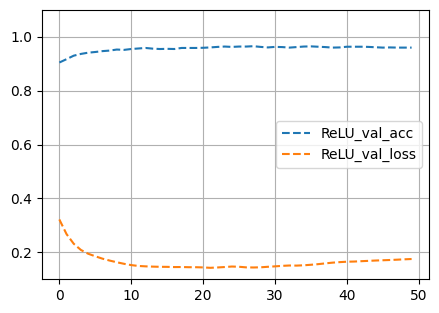

In [ ]:
import matplotlib.pylab as plt

print('MaxAcc:ReLU[',df['val_acc'].max())
plt.plot(df['val_acc'], linestyle='--', label="ReLU_val_acc")
plt.plot(df['val_loss'], linestyle='--', label="ReLU_val_loss")

plt.ylim(0.1,1.1)
plt.legend()
plt.grid()
plt.show()

MaxAcc:ReLU[ 0.97265625
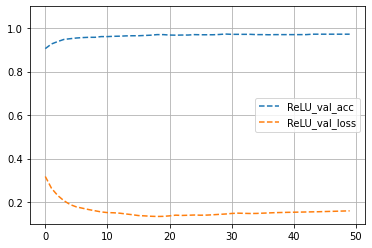

## Activation functions

---
```python
Non-linear Activations (weighted sum, nonlinearity)
​# Arguments가 없는 활성함수
  nn.ReLU       | = max(0,x) Rectified Linear Unit
  nn.Sigmoid    | = 1/(1+e^-x)
  nn.Tanh       | = tanh(x)= (e^x+e^−x)/(e^x− e^−x)
  nn.SiLU       | = x∗sigmoid(x)  Sigmoid Linear Unit(= swish)
  nn.Mish       | = x∗Tanh(Softplus(x))
  nn.Softsign   | = x/(abs(x) + 1)
  nn.Softplus   | = log(e^x + 1)

# ReLU에서 파생된 활성함수
  nn.Threshold  | = x if x>theshold else value
  nn.LeakyReLU  | = max(0,x)+ a∗ min(0,x), a=0.01
  nn.PReLU      | = max(0,x)+ a∗min(0,x), a: parameter
  nn.ReLU6      | = min(max(0,x),6)
  nn.RReLU      | = max(0,x)+ a∗min(0,x), a:U(0.125,0.333..)  randomized LeakyReLU
  nn.ELU        | = max(0,x)+ α∗(e^x-1), α=1 Exponential Linear Unit
  nn.SELU       | = scale∗(max(0,x)+ min(0,α∗(e^x−1))) with α=1.673...  and scale=1.0507...
  nn.CELU       | = max(0,x)+ min(0,α∗(exp(x/α)−1))  Continuously Differentiable ELU

Classification
  nn.Softmax    | xi = e^xi / ∑e^xi
```
---

 Activation 함수 그려보기

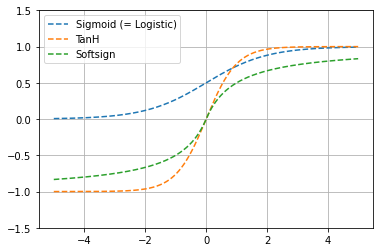

In [ ]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(-5, 5, 0.01)

# Sigmoid 유형
def sigmiod_func(x): # = sigmiod, Logistic
    return 1 / (1 + np.exp(-x))
plt.plot(x, sigmiod_func(x), linestyle='--', label="Sigmoid (= Logistic)")

def tanh_func(x): # TanH
    return np.tanh(x)
plt.plot(x, tanh_func(x), linestyle='--', label="TanH")

def softsign_func(x): # Softsign
    return x / ( 1+ np.abs(x) )
plt.plot(x, softsign_func(x), linestyle='--', label="Softsign")

plt.ylim(-1.5, 1.5)
plt.legend()
plt.grid()
plt.show()

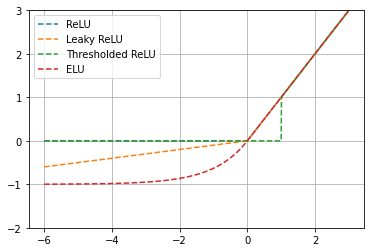

In [ ]:
x = np.arange(-6, 3, 0.01)

# ReLU 변형
def relu_func(x): # ReLU(Rectified Linear Unit)
    return (x>0)*x
plt.plot(x, relu_func(x), linestyle='--', label="ReLU")

def leakyrelu_func(x,a=0.01): # Leaky ReLU
    return (x>=0)*x + (x<0)*a*x
plt.plot(x, leakyrelu_func(x,a=0.1), linestyle='--', label="Leaky ReLU")

def trelu_func(x,th=1): # Thresholded ReLU
    return (x>th)*x
plt.plot(x, trelu_func(x), linestyle='--', label="Thresholded ReLU")

def elu_func(x,a=1): # ELU(Exponential linear unit)
    return (x>=0)*x + (x<0)*a*(np.exp(x)-1)
plt.plot(x, elu_func(x,a=1), linestyle='--', label="ELU")

plt.ylim(-2, 3)
plt.legend()
plt.grid()
plt.show()

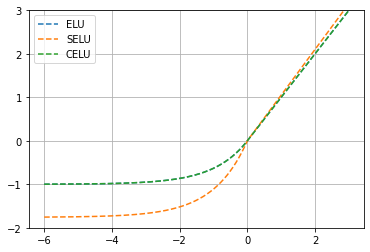

In [ ]:
def elu_func(x,a=1): # ELU(Exponential linear unit)
    return (x>=0)*x + (x<0)*a*(np.exp(x)-1) # 0.9 조정
plt.plot(x, elu_func(x,a=1), linestyle='--', label="ELU")

def selu_func(x): # SELU
    a = 1.6732632423
    scale = 1.0507009873
    return scale*((x>=0)*x + (x<0)*a*(np.exp(x)-1))
plt.plot(x, selu_func(x), linestyle='--', label="SELU")

def celu_func(x,a=1): # CELU
    return (x>=0)*x + (x<0)*a*(np.exp(x/a)-1)
plt.plot(x, celu_func(x,a=1), linestyle='--', label="CELU")

plt.ylim(-2, 3)
plt.legend()
plt.grid()
plt.show()

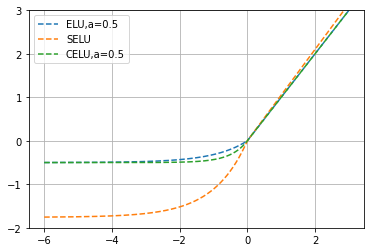

In [ ]:
plt.plot(x, elu_func(x,a=0.5), linestyle='--', label="ELU,a=0.5")
plt.plot(x, selu_func(x), linestyle='--', label="SELU")
plt.plot(x, celu_func(x,a=0.5), linestyle='--', label="CELU,a=0.5")

plt.ylim(-2, 3)
plt.legend()
plt.grid()
plt.show()

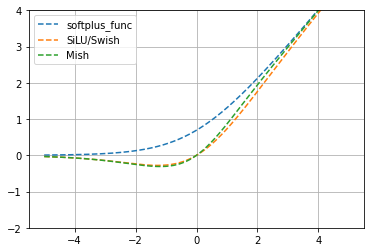

In [ ]:
x = np.arange(-5, 5, 0.01)

# 기타
def softplus_func(x):
    return np.log(np.exp(x)+1)
plt.plot(x, softplus_func(x), linestyle='--', label="softplus_func")

def SiLU_func(x):
    return x*(sigmiod_func(x))
plt.plot(x, SiLU_func(x), linestyle='--', label="SiLU/Swish")

def Mish_func(x):
    return x*np.tanh(softplus_func(x))
plt.plot(x, Mish_func(x), linestyle='--', label="Mish")

plt.ylim(-2, 4)
plt.legend()
plt.grid()
plt.show()

## Activation function에 따른 성능 비교

In [ ]:
loss_function = nn.CrossEntropyLoss()
class Model2(pl.LightningModule):
    def __init__(self):
        super(Model2, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
#            nn.SELU(),
            nn.PReLU(num_parameters=128),
#            nn.Mish(),
#            nn.ReLU(),
            nn.Linear(128, 10))

    def forward(self, x):
        x = self.layers(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = loss_function(y_pred, y)
        acc = FM.accuracy(y_pred, y, task="multiclass",num_classes=10)
        metrics={'loss':loss, 'acc':acc}
        self.log_dict(metrics)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = loss_function(y_pred, y)
        acc = FM.accuracy(y_pred, y, task="multiclass",num_classes=10)
        metrics = {'val_loss':loss, 'val_acc':acc}
        self.log_dict(metrics)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

model = Model2()
summary(model, input_size=(8, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Model2                                   [8, 10]                   --
├─Sequential: 1-1                        [8, 10]                   --
│    └─Flatten: 2-1                      [8, 784]                  --
│    └─Linear: 2-2                       [8, 128]                  100,480
│    └─PReLU: 2-3                        [8, 128]                  128
│    └─Linear: 2-4                       [8, 10]                   1,290
Total params: 101,898
Trainable params: 101,898
Non-trainable params: 0
Total mult-adds (M): 0.82
Input size (MB): 0.03
Forward/backward pass size (MB): 0.02
Params size (MB): 0.41
Estimated Total Size (MB): 0.45

In [ ]:
%%time
epochs = 50
name="PReLU_Model"
#name="Mish_Model"
#name="SELU_Model"
logger = pl.loggers.CSVLogger("logs", name=name)
trainer = pl.Trainer(max_epochs=epochs, logger=logger, accelerator='auto',overfit_batches=0.3)
trainer.fit(model, data_module)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 101 K 
--------------------------------------
101 K     Trainable params
0         Non-trainable params
101 K     Total params
0.408     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


CPU times: user 4min 4s, sys: 1.23 s, total: 4min 6s
Wall time: 4min 30s


In [ ]:
v_num = logger.version
history = pd.read_csv(f'./logs/{name}/version_{v_num}/metrics.csv')
df2 = history.groupby('epoch').mean().drop('step', axis=1)

MaxAcc:ReLU[ 0.96484375 ] PReLU.[ 0.970703125 ]


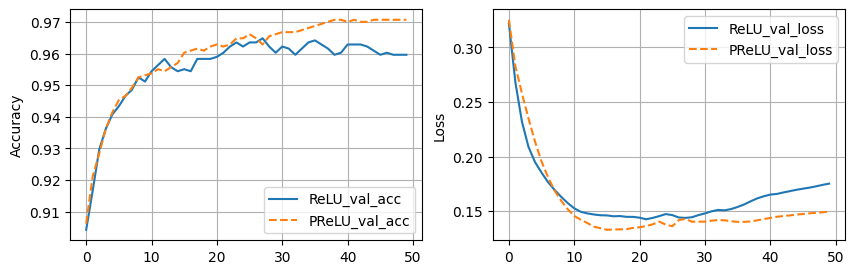

In [ ]:
print('MaxAcc:ReLU[',df['val_acc'].max(),'] PReLU.[',df2['val_acc'].max(),']')
#print('MaxAcc:ReLU[',df['val_acc'].max(),'] SELU.[',df4['val_acc'].max(),']')

plt.figure(figsize=(10, 3.))
plt.subplot(1, 2, 1)
plt.plot(df['val_acc'], linestyle='-', label="ReLU_val_acc")
plt.plot(df2['val_acc'], linestyle='--', label="PReLU_val_acc")
plt.grid()
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df['val_loss'], linestyle='-', label="ReLU_val_loss")
plt.plot(df2['val_loss'], linestyle='--', label="PReLU_val_loss")
plt.grid()
plt.ylabel('Loss')
plt.legend()

# plt.plot(df4['val_acc'], linestyle='--', label="SELU_val_acc")
# plt.plot(df4['val_loss'], linestyle='--', label="SELU_val_loss")
# plt.plot(df2['val_acc'], linestyle='--', label="Mish_val_acc")
# plt.plot(df2['val_loss'], linestyle='--', label="Mish_val_loss")

plt.show()

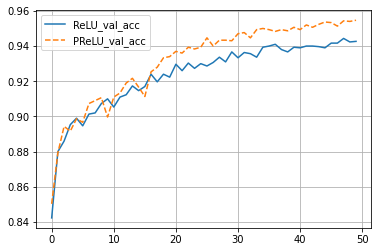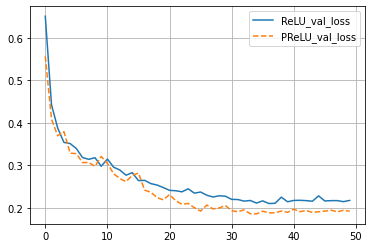

## Weight decay(L2 Regularization)

---
```python
## L2 regularization
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
```
---

In [ ]:
loss_function = nn.CrossEntropyLoss()
l2_regularization = 0.001
class Model3(Model):
    def __init__(self):
        super(Model3, self).__init__()
        self.layers = Model()

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001, weight_decay=l2_regularization)

model = Model3()
summary(model, input_size=(8, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Model3                                   [8, 10]                   --
├─Model: 1-1                             [8, 10]                   --
│    └─Sequential: 2-1                   [8, 10]                   --
│    │    └─Flatten: 3-1                 [8, 784]                  --
│    │    └─Linear: 3-2                  [8, 128]                  100,480
│    │    └─ReLU: 3-3                    [8, 128]                  --
│    │    └─Linear: 3-4                  [8, 10]                   1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 0.81
Input size (MB): 0.03
Forward/backward pass size (MB): 0.01
Params size (MB): 0.41
Estimated Total Size (MB): 0.44

In [ ]:
%%time
epochs = 50
name="L2_Reg._Model"
logger = pl.loggers.CSVLogger("logs", name=name)
trainer = pl.Trainer(max_epochs=epochs, logger=logger, accelerator='auto',overfit_batches=0.3)
trainer.fit(model, data_module)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type  | Params
---------------------------------
0 | layers | Model | 101 K 
---------------------------------
101 K     Trainable params
0         Non-trainable params
101 K     Total params
0.407     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


CPU times: user 3min 42s, sys: 1.25 s, total: 3min 43s
Wall time: 3min 46s


CPU times: user 2min 35s, sys: 858 ms, total: 2min 36s
Wall time: 2min 38s

In [ ]:
v_num = logger.version
history = pd.read_csv(f'./logs/{name}/version_{v_num}/metrics.csv')
df2 = history.groupby('epoch').mean().drop('step', axis=1)

In [ ]:
print('MaxAcc:ReLU[',df['val_acc'].max(),'] L2Reg.[',df2['val_acc'].max(),']')

plt.figure(figsize=(10, 3.))
plt.subplot(1, 2, 1)
plt.plot(df['val_acc'], linestyle='-', label="ReLU_val_acc")
plt.plot(df2['val_acc'], linestyle='--', label="L2reg._val_acc")
plt.grid()
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df['val_loss'], linestyle='-', label="ReLU_val_loss")
plt.plot(df2['val_loss'], linestyle='--', label="L2reg._val_loss")
plt.grid()
plt.ylabel('Loss')
plt.legend()

plt.show()

MaxAcc:ReLU[ 0.96484375 ] L2Reg.[ 0.9713541865348816 ]
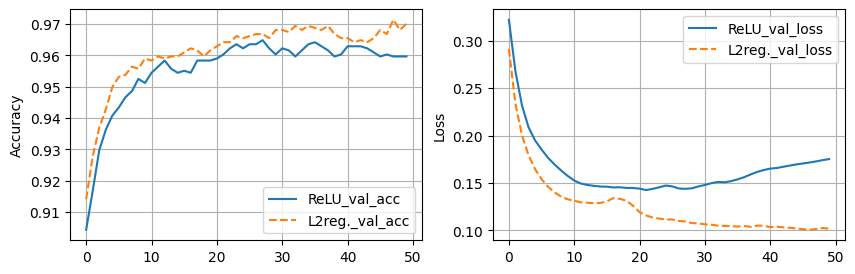

### Weigth 변화를 확인해 보자

#### Weight monitering

In [ ]:
model.layers

Model(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [ ]:
model.layers.state_dict()

OrderedDict([('layers.1.weight',
              tensor([[ 0.0003, -0.0182, -0.0047,  ...,  0.0140,  0.0328, -0.0148],
                      [-0.0107, -0.0299,  0.0280,  ..., -0.0075, -0.0279,  0.0357],
                      [-0.0192, -0.0222, -0.0151,  ..., -0.0037, -0.0059, -0.0257],
                      ...,
                      [-0.0253, -0.0023,  0.0006,  ...,  0.0003, -0.0122, -0.0355],
                      [ 0.0209,  0.0321,  0.0173,  ..., -0.0317,  0.0098,  0.0229],
                      [ 0.0296,  0.0046,  0.0074,  ...,  0.0301, -0.0088, -0.0020]],
                     device='cuda:0')),
             ('layers.1.bias',
              tensor([-1.7775e-02, -1.1087e-02,  3.2010e-02,  9.8942e-03, -9.4516e-03,
                       1.9953e-02,  3.1427e-02, -6.8940e-03, -2.3953e-02, -2.7469e-02,
                      -4.8181e-03, -1.8402e-02, -2.5581e-02,  2.7951e-02, -1.8498e-03,
                       5.0996e-03,  4.1048e-03, -2.5545e-02, -2.9619e-02,  2.9835e-02,
                

In [ ]:
p(model.layers.state_dict()['layers.1.weight'])

<<>>:
Shape:torch.Size([128, 784])
Type: <class 'torch.Tensor'>
Values: tensor([[ 0.0003, -0.0182, -0.0047,  ...,  0.0140,  0.0328, -0.0148],
        [-0.0107, -0.0299,  0.0280,  ..., -0.0075, -0.0279,  0.0357],
        [-0.0192, -0.0222, -0.0151,  ..., -0.0037, -0.0059, -0.0257],
        ...,
        [-0.0253, -0.0023,  0.0006,  ...,  0.0003, -0.0122, -0.0355],
        [ 0.0209,  0.0321,  0.0173,  ..., -0.0317,  0.0098,  0.0229],
        [ 0.0296,  0.0046,  0.0074,  ...,  0.0301, -0.0088, -0.0020]],
       device='cuda:0')


In [ ]:
p(model.layers.state_dict()['layers.1.bias'])

<<>>:
Shape:torch.Size([128])
Type: <class 'torch.Tensor'>
Values: tensor([-1.7775e-02, -1.1087e-02,  3.2010e-02,  9.8942e-03, -9.4516e-03,
         1.9953e-02,  3.1427e-02, -6.8940e-03, -2.3953e-02, -2.7469e-02,
        -4.8181e-03, -1.8402e-02, -2.5581e-02,  2.7951e-02, -1.8498e-03,
         5.0996e-03,  4.1048e-03, -2.5545e-02, -2.9619e-02,  2.9835e-02,
        -1.2180e-02, -4.8655e-03, -1.6792e-02, -5.0827e-03,  2.4751e-02,
        -1.1862e-02,  2.6027e-02, -1.4886e-02, -1.4828e-02,  7.6919e-04,
         3.2967e-02,  2.8653e-02,  3.2106e-02, -6.3827e-03,  3.5657e-02,
         2.5946e-02, -5.0495e-03, -1.4749e-02, -2.6984e-02,  2.8061e-02,
         2.8927e-02,  2.6355e-02, -1.3664e-02,  5.4335e-03, -3.5301e-02,
        -1.6677e-02,  3.3160e-02, -3.3733e-02,  2.6332e-02, -5.7899e-03,
         1.9630e-02, -5.4924e-03,  1.0617e-02,  1.0081e-02, -3.1964e-02,
         2.3487e-02,  3.4929e-02, -3.2223e-02, -2.6395e-02, -7.6044e-03,
        -2.1858e-02,  1.0717e-02,  1.3124e-02,  1.4932e-0

In [ ]:
weight = model.layers.state_dict()['layers.1.weight']
p(weight,'cr')
p(weight.cpu().detach().numpy())

Shape:torch.Size([128, 784])
Type: <class 'torch.Tensor'>
Values: tensor([[ 0.0003, -0.0182, -0.0047,  ...,  0.0140,  0.0328, -0.0148],
        [-0.0107, -0.0299,  0.0280,  ..., -0.0075, -0.0279,  0.0357],
        [-0.0192, -0.0222, -0.0151,  ..., -0.0037, -0.0059, -0.0257],
        ...,
        [-0.0253, -0.0023,  0.0006,  ...,  0.0003, -0.0122, -0.0355],
        [ 0.0209,  0.0321,  0.0173,  ..., -0.0317,  0.0098,  0.0229],
        [ 0.0296,  0.0046,  0.0074,  ...,  0.0301, -0.0088, -0.0020]],
       device='cuda:0')

<<>>:
Shape:(128, 784)
Type: <class 'numpy.ndarray'>
Values: [[ 0.0002801  -0.01816025 -0.00472302 ...  0.01395364  0.03279788
  -0.01483265]
 [-0.01071038 -0.02986264  0.02796456 ... -0.00750422 -0.02786879
   0.03570851]
 [-0.01916109 -0.0221739  -0.01508312 ... -0.00370359 -0.00585184
  -0.02566336]
 ...
 [-0.02525772 -0.00225211  0.00064503 ...  0.0003118  -0.01216389
  -0.03553667]
 [ 0.02086691  0.03208385  0.01729753 ... -0.03165809  0.00981788
   0.02290518]
 [ 0

In [ ]:
# for p in model.layers.parameters():
#   ps(p.cpu().detach().numpy())

In [ ]:
#p(np.array([x.cpu().detach().numpy() for x in model.layers.parameters()])[2])

#### Custom callback

In [ ]:
from pytorch_lightning.callbacks import Callback
layer_n = 2
class WeightHistory(Callback):
  def on_train_start(self, trainer, pl_module):
    self.k_weight = []
  def on_train_batch_end(self, *args, **kwargs):
    w = model.layers.state_dict()['layers.1.weight'].cpu().detach().numpy()
    self.k_weight.append(w)

In [ ]:
model = Model3()

name = 'L2_weight'
logger = pl.loggers.CSVLogger("logs", name=name)
trainer = pl.Trainer(max_epochs=10, logger=logger, callbacks=[WeightHistory()], accelerator='auto',overfit_batches=0.3)
trainer.fit(model, data_module)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type  | Params
---------------------------------
0 | layers | Model | 101 K 
---------------------------------
101 K     Trainable params
0         Non-trainable params
101 K     Total params
0.407     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
ps(np.array(trainer.callbacks[0].k_weight))

[] Shape(640, 128, 784)


In [ ]:
w = np.array(trainer.callbacks[0].k_weight)
plt.plot(w[:,120,280:300])   #(batch, i/128, 0/784)
plt.grid()
plt.show()

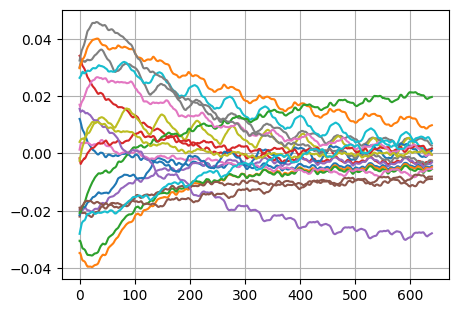

In [ ]:
v_num = logger.version
history = pd.read_csv(f'./logs/{name}/version_{v_num}/metrics.csv')
df2 = history.groupby('epoch').mean().drop('step', axis=1)

In [ ]:
import matplotlib.pylab as plt

print('MaxAcc:ReLU[',df2['val_acc'].max())

plt.plot(df2['val_acc'], linestyle='-', label="ReLU_val_acc")
plt.plot(df2['val_loss'], linestyle='-', label="ReLU_val_loss")

#plt.ylim(0.1, 0.6)
plt.legend()
plt.grid()
plt.show()

MaxAcc:ReLU[ 0.9169999957084656
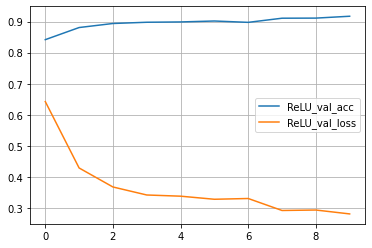
---




## Dropout

In [ ]:
loss_function = nn.CrossEntropyLoss()
class Model4(pl.LightningModule):
    def __init__(self):
        super(Model4, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 10))

    def forward(self, x):
        x = self.layers(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = loss_function(y_pred, y)
        acc = FM.accuracy(y_pred, y, task="multiclass",num_classes=10)
        metrics={'loss':loss, 'acc':acc}
        self.log_dict(metrics)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = loss_function(y_pred, y)
        acc = FM.accuracy(y_pred, y, task="multiclass",num_classes=10)
        metrics = {'val_loss':loss, 'val_acc':acc}
        self.log_dict(metrics)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

model = Model4()
summary(model, input_size=(8, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Model4                                   [8, 10]                   --
├─Sequential: 1-1                        [8, 10]                   --
│    └─Flatten: 2-1                      [8, 784]                  --
│    └─Linear: 2-2                       [8, 128]                  100,480
│    └─ReLU: 2-3                         [8, 128]                  --
│    └─Dropout: 2-4                      [8, 128]                  --
│    └─Linear: 2-5                       [8, 10]                   1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 0.81
Input size (MB): 0.03
Forward/backward pass size (MB): 0.01
Params size (MB): 0.41
Estimated Total Size (MB): 0.44

In [ ]:
model = Model4()

name = 'Dropout'
logger = pl.loggers.CSVLogger("logs", name=name)
trainer = pl.Trainer(max_epochs=70, logger=logger, accelerator='auto',overfit_batches=0.3)
trainer.fit(model, data_module)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 101 K 
--------------------------------------
101 K     Trainable params
0         Non-trainable params
101 K     Total params
0.407     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=70` reached.


In [ ]:
v_num = logger.version
history = pd.read_csv(f'./logs/{name}/version_{v_num}/metrics.csv')
df2 = history.groupby('epoch').mean().drop('step', axis=1)

In [ ]:
import matplotlib.pylab as plt

print('MaxAcc:ReLU[',df['val_acc'].max(),'] Dropout.[',df2['val_acc'].max(),']')

plt.plot(df['val_acc'], linestyle='-', label="ReLU_val_acc")
plt.plot(df['val_loss'], linestyle='-', label="ReLU_val_loss")
plt.plot(df2['val_acc'], linestyle='--', label="Dropout_val_acc")
plt.plot(df2['val_loss'], linestyle='--', label="Dropout_val_loss")

#plt.ylim(0.2,0.95)
plt.legend()
plt.grid()
plt.show()

MaxAcc:ReLU[ 0.96484375 ] Dropout.[ 0.966796875 ]
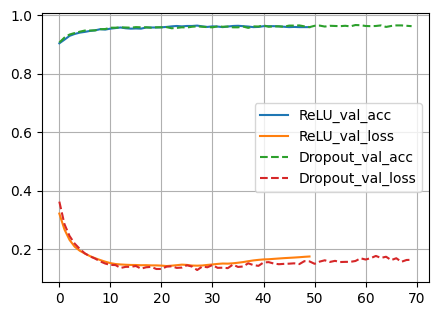

MaxAcc:ReLU[ 0.9493333101272584 ] Dropout.[ 0.959999978542328 ]
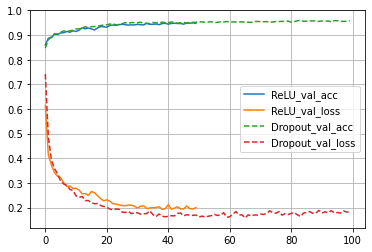

## BatchNormalization

In [ ]:
loss_function = nn.CrossEntropyLoss()
class Model5(pl.LightningModule):
    def __init__(self):
        super(Model5, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 10),
            nn.BatchNorm1d(10) )

    def forward(self, x):
        x = self.layers(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = loss_function(y_pred, y)
        acc = FM.accuracy(y_pred, y, task="multiclass",num_classes=10)
        metrics={'loss':loss, 'acc':acc}
        self.log_dict(metrics)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = loss_function(y_pred, y)
        acc = FM.accuracy(y_pred, y, task="multiclass",num_classes=10)
        metrics = {'val_loss':loss, 'val_acc':acc}
        self.log_dict(metrics)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

model = Model5()
summary(model, input_size=(8, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Model5                                   [8, 10]                   --
├─Sequential: 1-1                        [8, 10]                   --
│    └─Flatten: 2-1                      [8, 784]                  --
│    └─Linear: 2-2                       [8, 128]                  100,480
│    └─BatchNorm1d: 2-3                  [8, 128]                  256
│    └─ReLU: 2-4                         [8, 128]                  --
│    └─Linear: 2-5                       [8, 10]                   1,290
│    └─BatchNorm1d: 2-6                  [8, 10]                   20
Total params: 102,046
Trainable params: 102,046
Non-trainable params: 0
Total mult-adds (M): 0.82
Input size (MB): 0.03
Forward/backward pass size (MB): 0.02
Params size (MB): 0.41
Estimated Total Size (MB): 0.45

In [ ]:
%%time
model = Model5()

name = 'BatchNorm'
logger = pl.loggers.CSVLogger("logs", name=name)
trainer = pl.Trainer(max_epochs=50, logger=logger, accelerator='auto',overfit_batches=0.1)
trainer.fit(model, data_module)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type       | Params
--------------------------------------
0 | layers | Sequential | 102 K 
--------------------------------------
102 K     Trainable params
0         Non-trainable params
102 K     Total params
0.408     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.9/dist-packages/pytorch_lightning/loops/fit_loop.py:280: PossibleUserWarning: The number of training batches (21) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


In [ ]:
v_num = logger.version ## model.get_progress_bar_dict()['v_num']
history = pd.read_csv(f'./logs/{name}/version_{v_num}/metrics.csv')
df2 = history.groupby('epoch').mean().drop('step', axis=1)

In [ ]:
import matplotlib.pylab as plt

print('MaxAcc:ReLU[',df['val_acc'].max(),'] BatchNorm.[',df2['val_acc'].max(),']')

plt.plot(df['val_acc'], linestyle='-', label="ReLU_val_acc")
plt.plot(df['val_loss'], linestyle='-', label="ReLU_val_loss")
plt.plot(df2['val_acc'], linestyle='--', label="BatchNorm_val_acc")
plt.plot(df2['val_loss'], linestyle='--', label="BatchNorm_val_loss")

#plt.ylim(0.2,0.95)
plt.legend()
plt.grid()
plt.show()

MaxAcc:ReLU[ 0.9493333101272584 ] BatchNorm.[ 0.9679999947547911 ]
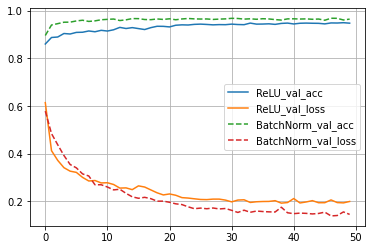

In [ ]:
model

Model5(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
    (5): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

In [ ]:
model.layers.state_dict()

OrderedDict([('1.weight',
              tensor([[ 0.0345, -0.0039,  0.0285,  ...,  0.0250,  0.0207,  0.0113],
                      [ 0.0309, -0.0229, -0.0233,  ..., -0.0355, -0.0309, -0.0166],
                      [-0.0173, -0.0009,  0.0114,  ...,  0.0024,  0.0279,  0.0167],
                      ...,
                      [-0.0071, -0.0238,  0.0182,  ...,  0.0276,  0.0096, -0.0011],
                      [ 0.0232,  0.0242,  0.0060,  ...,  0.0104,  0.0262,  0.0170],
                      [ 0.0051,  0.0045,  0.0011,  ...,  0.0292,  0.0043, -0.0239]])),
             ('1.bias',
              tensor([ 0.0072,  0.0136,  0.0079, -0.0017, -0.0007,  0.0271, -0.0305, -0.0343,
                      -0.0112, -0.0353, -0.0094, -0.0111,  0.0291, -0.0095,  0.0295, -0.0031,
                      -0.0084,  0.0096, -0.0276, -0.0081, -0.0170, -0.0293,  0.0318, -0.0286,
                      -0.0109, -0.0112,  0.0294, -0.0182,  0.0309,  0.0330,  0.0172,  0.0249,
                      -0.0261,  0.0357, 

In [ ]:
p = model.layers.state_dict()
p_k = list(p.keys())
#print(p_k)
for k in p_k:
  print(k,':',model.layers.state_dict()[str(k)].size())

1.weight : torch.Size([128, 784])
1.bias : torch.Size([128])
2.weight : torch.Size([128])
2.bias : torch.Size([128])
2.running_mean : torch.Size([128])
2.running_var : torch.Size([128])
2.num_batches_tracked : torch.Size([])
4.weight : torch.Size([10, 128])
4.bias : torch.Size([10])
5.weight : torch.Size([10])
5.bias : torch.Size([10])
5.running_mean : torch.Size([10])
5.running_var : torch.Size([10])
5.num_batches_tracked : torch.Size([])


In [ ]:
for p in model.layers.parameters():
  print(p.size())